Recommendation Engine using Amazon Beauty Product

This data set is take from https://www.kaggle.com/skillsmuggler/amazon-ratings.
This data set contain 4 column which are UserId, ProductId, Rating and Timestamp, and total 1048576 row in this data set.

In this project was using SVD (Singular value decomposition) model to build the recommendation for the data set. At the last of the project, user can key in the UserId in the model, then the model will come out top 5 recommendation product based on the UseID. 

In [1]:
#Import library for this project usage
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display 
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy
from collections import defaultdi

In [26]:
#Import the data into python
data = pd.read_csv ('ratings_Beauty.csv')

In [27]:
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [28]:
#check the data info
#we know that the UserID and ProductId are object type, Rating is integer type and Timestamp is float type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [29]:
data.Rating.value_counts()

5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
Name: Rating, dtype: int64

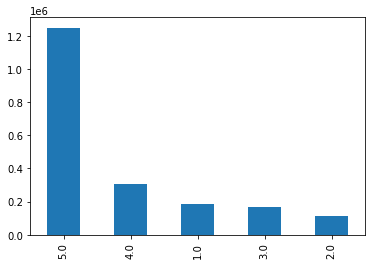

In [30]:
data.Rating.value_counts().plot(kind='bar')
plt.show()
#Based on the graph, we can knwo that most of the beauty product have the highest rating.

In [31]:
#check have missing value or not
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

# Data Preprosessing

In [5]:
#rop the timestamp out of the data set
data = data[['UserId', 'ProductId', 'Rating', 'Timestamp']]
data = data.iloc[:, :-1]

In [6]:

reader = Reader(rating_scale = (1.0, 5.0))
data = Dataset.load_from_df(data[['UserId', 'ProductId', 'Rating']], reader)

## Model Training

In [7]:
#Split the dataset to train and test

trainset, testset = train_test_split(data, test_size=0.25)

In [8]:
# Train the model
algo = SVD(n_epochs = 20, n_factors = 50, verbose = True)
algo.fit(trainset)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [9]:
predictions = algo.test(testset)

## Model Evaluation

In [10]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.2498


1.2498462439924736

In [42]:
predicted_rating = algo.predict(str('A1PSGLFK1NSVO'), str(143026860))

In [43]:
predicted_rating

Prediction(uid='A1PSGLFK1NSVO', iid='143026860', r_ui=None, est=4.280390786429276, details={'was_impossible': False})

In [40]:
recommendations = [pred for pred in predictions if pred[0] == 'A1PSGLFK1NSVO']

In [41]:
recommendations

[Prediction(uid='A1PSGLFK1NSVO', iid='B0009XH6XW', r_ui=5.0, est=4.261523607082321, details={'was_impossible': False})]

In [18]:
# Append all the predictions done by svd model into dictionary
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n

all_pred = get_all_predictions(predictions)

In [19]:
new_all_pred=dict(filter(lambda elem: len(elem[1]) != 1, all_pred.items()))

In [20]:
#Only take the top 5 recommendation product in the dictionary and change the dictionary to dataframe
n = 5
for uid, user_ratings in new_all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    new_all_pred[uid] = user_ratings[:n]
    
tmp = pd.DataFrame.from_dict(new_all_pred,orient='index')


In [24]:
#Key in the UserID you will get the top 5 recommendation product for the user
def get_predictions(user_id):
    results = tmp.loc[user_id]
    return results

user_id='A24PGDMY8R6MTF'
results = get_predictions(user_id)
results

0     (B005IMHDW8, 4.48409048915299)
1    (B003XKW8RM, 4.300928760755514)
2    (B00B2UU5FC, 4.136711877330682)
3                               None
Name: A24PGDMY8R6MTF, dtype: object